# SLU13 - Tree-based models: Exercises

In [31]:
import inspect
import warnings
warnings.filterwarnings("ignore")

import hashlib

import pandas as pd
import numpy as np

from IPython.display import Image

from utils.utils import (
    make_data,
    make_exercise_data,
    separate_target_variable,
    process_categorical_features,
    visualize_tree
)

# Exercise 1 - Decision Trees

## 1.1 Gini impurity

Used by the CART algorithm for classification, Gini impurity is an alternative to entropy.

Similarly to entropy, it is a way to measure node homogeneity. As such, it can be used to identify promising splits.

Take $p$ as the probability of the positive class, i.e., the proportion of positive cases in the set. The Gini impurity is given by:

$$I_G(p)= 1 - p^2 - (1-p)^2$$

It measures how often a randomly chosen element from the set would be incorrectly labeled.

In [32]:
def gini(p):
    # YOUR CODE HERE
    gini = 1 - p**2 - (1 - p)**2
    
    return gini

In [33]:
expected_hash_1 = '5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9'
assert hashlib.sha256(str(round(gini(p=0), 4)).encode('utf-8')).hexdigest() == expected_hash_1

expected_hash_2 = 'fa0caf4143366743bd4e6038047902f64d769e3e3efec2bb32aecf1d0c7c6201'
assert hashlib.sha256(str(round(gini(p=1/6), 4)).encode('utf-8')).hexdigest() == expected_hash_2

expected_hash_3 = '26135280b4d9cae287edf7dec0cde84815fd61414f9509d6a4376b09eb946862'
assert hashlib.sha256(str(round(gini(p=1/3), 4)).encode('utf-8')).hexdigest() == expected_hash_3

expected_hash_4 = 'd2cbad71ff333de67d07ec676e352ab7f38248eb69c942950157220607c55e84'
assert hashlib.sha256(str(round(gini(p=1/2), 4)).encode('utf-8')).hexdigest() == expected_hash_4

## 1.2 Applying the Gini 

### 1.2.1 Single node

Compute the impurity of a node that includes all instances where $x_i^{Windy}$ is `'false'`.

(Note that `'false'` is a string, not a boolean.)

In [34]:
def compute_probability(node):
    # YOUR CODE HERE
    raise NotImplementedError()

# single_node_gini = ...
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [35]:
expected_hash_5 = '16ad1c0bd6e26646912d571c740893247f61468655d52878989e9d858710655b'
wrong_condition_hash = 'd2cbad71ff333de67d07ec676e352ab7f38248eb69c942950157220607c55e84'

assert hashlib.sha256(str(round(single_node_gini, 2)).encode('utf-8')).hexdigest() != wrong_condition_hash, "Are you checking all instances where Windy is FALSE?"
assert hashlib.sha256(str(round(single_node_gini, 2)).encode('utf-8')).hexdigest() == expected_hash_5, "Are you computing the probability for the right node?"

NameError: name 'single_node_gini' is not defined

### 1.2.2 Single feature

Write a function to compute the mean impurity of branching on a given feature.

In [36]:
from statistics import mean


def mean_impurity(data, feature_name):
    # YOUR CODE HERE
    raise NotImplementedError()

In [37]:
assert 'mean(' in inspect.getsource(mean_impurity), "Are you using the mean function that was imported?"

assert round(mean_impurity(data, 'Temperature'), 4) == 0.4398

expected_hash_6 = '60bb8f6c52a2aca85b1a3ae08e71f97dd3fa8603b55abefb09ebb0edfe5294d1'
assert hashlib.sha256(str(round(mean_impurity(data, 'Outlook'), 4)).encode('utf-8')).hexdigest() == expected_hash_6

expected_hash_7 = '944f11aadeebc86111e0d537211a68e2e559f194ca0b99186a345af21afda3bf'
assert hashlib.sha256(str(round(mean_impurity(data, 'Humidity'), 4)).encode('utf-8')).hexdigest() == expected_hash_7

expected_hash_8 = 'ad9dadb817c4ea957beef59cc28b49ccb843c8c0996b1492547942a1cc6925ba'
assert hashlib.sha256(str(round(mean_impurity(data, 'Windy'), 4)).encode('utf-8')).hexdigest() == expected_hash_8

AssertionError: Are you using the mean function that was imported?

## 1.3 Analyzing a decision tree

### 1.3.1 Import and train a DecisionTreeClassifier using the features in X, and the class in y. 

Notes:

* Set `random_state = 101`
* use the `entropy`criterion

In [83]:
exercise_data = make_exercise_data()
X, y = separate_target_variable(exercise_data)
X = process_categorical_features(X)

# Import the model
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier


# Instantiate the model with random_state=101, and assign it to variable "model". Then fit it to the data
# model = ...
# YOUR CODE HERE
model = DecisionTreeClassifier(criterion='entropy', random_state=101)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [84]:
params_hash = 'cce5eed70c52e25cc31d042d2a737c49c69619ef687d9a8e636a9fdaff3eb99a'
assert hashlib.sha256(str(model.get_params()).encode('utf-8')).hexdigest() == params_hash, "Did you set all the required parameters?"

### 1.3.2 Analyze the resulting tree, and answer questions.

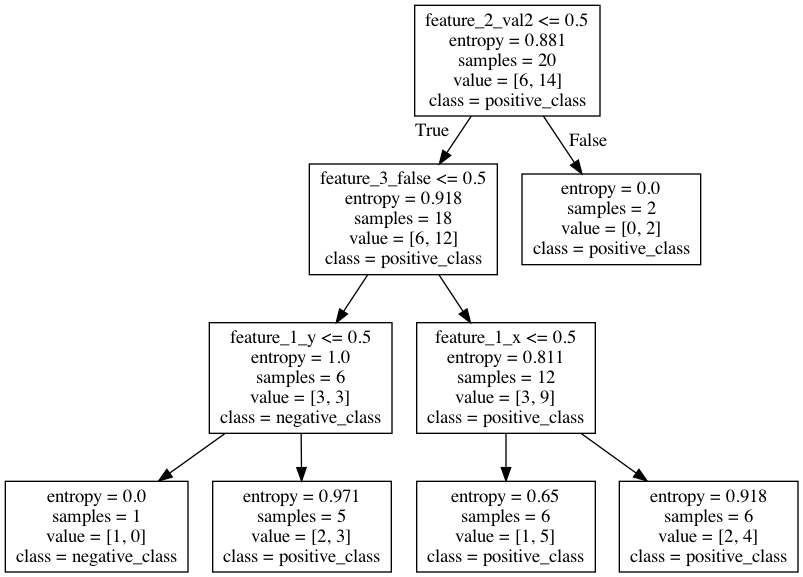

In [85]:
tree = visualize_tree(model, X.columns, ["negative_class", "positive_class"])
Image(tree)

a) A new instance of data has the following features: 

* `feature_2` is not equal to `val2`;
* `feature_3` is not equal to `false`;
* `feature_1` is not equal to `y`.

What class does this new instance belong to? ('positive_class' or 'negative_class'). 
Assign the answer to variable `a_answer`

In [101]:
# a_answer = ...
# YOUR CODE HERE
a_answer = 'negative_class' 

b) Are all leaf nodes in this tree pure (only have elements from a single class)? Assign the answer ("yes" or "no") to variable `b_answer`.

In [102]:
# b_answer = ...
# YOUR CODE HERE
b_answer = "no" 

c) Assign the **number** (1, 2, 3 or 4) of the FALSE statement to variable `c_answer`:

1. Entropy can be seen as a measure of homogeneity in a set of values. The more entropy, the less homogeneous it will be.
2. Decision trees are extremely robust to overfitting.
3. We can use a decision tree to represent a set of complex rules.
4. When building a decision tree using the ID3 algorithm,  at each split, we select the attribute test that leads to the highest information gain.

In [103]:
# c_answer = ...
# YOUR CODE HERE
c_answer = 2

d) What is the name of the most important_feature? Assign it to variable `d_answer`. Feel free to use any functions/methods needed to obtain this answer.

In [104]:
# feature_importances = ...
# d_answer = ...
feature_importances = pd.Series(data=model.feature_importances_, index=X.columns)
feature_importances.sort_values()

print(feature_importances)
# YOUR CODE HERE
d_answer = 'feature_1_y'

feature_1_x        0.096820
feature_1_y        0.340730
feature_2_val1     0.000000
feature_2_val2     0.326225
feature_3_false    0.236225
feature_3_true     0.000000
dtype: float64


In [105]:
all_answers_hash = '2427c08b52f5adcc70d35c00e27ffbfa9f56b9c5af4fdb158c7cfacc397edeef'
final_answer = b_answer + a_answer + str(c_answer) + d_answer
assert hashlib.sha256(final_answer.encode('utf-8')).hexdigest() == all_answers_hash, "One or more of the answers are wrong!"

# Exercise 2 - Random Forests

## 2.1 Bagging

Assign the lowercase letter of the **incorrect statement** to variable `bagging_answer`:

a) Bagging is an ensemble method in which the predictions of several weak learners are combined to generate a final prediction.

b) Bootstrapping, often used when bagging, is the creation of several datasets through row sampling of a main dataset.

c) Bagging helps with controlling overfitting because extreme predictions are often "smoothed out" by the majority vote.

d) When bagging, we want our models to be as correlated as possible, so they share the same strengths and weaknesses.

In [ ]:
# bagging_answer = ...
# YOUR CODE HERE
bagging_answer = 'd'

In [ ]:
bagging_hash = '18ac3e7343f016890c510e93f935261169d9e3f565436429830faf0934f4f8e4'
assert hashlib.sha256(bagging_answer.encode('utf-8')).hexdigest() == bagging_hash

## 2.2 Random forests

Assign the lowercase letter of the **incorrect statement** to variable `forest_answer`:

a) We use random feature selection with random forests to force our models to be "creative" and adapt to not having access to the full information, thus increasing diversity inside the ensemble.

b) In a Random Forest, having a single overfitting tree is terrible and can ruin the final prediction.

c) Random forests aggregate the predictions of multiple models running in parallel

In [ ]:
# forest_answer = ...
# YOUR CODE HERE
forest_answer = 'b'

In [ ]:
expected_hash_11 = '3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d'
assert hashlib.sha256(forest_answer.encode('utf-8')).hexdigest() == expected_hash_11

# Exercise 3 - Gradient boosting

Assign the lowercase letter of the **incorrect statement** to variable `boosting_answer`:

a) Gradient boosting fits individual trees sequentially, to the negative gradients of the previous tree.

b) When using the mean squared error loss function in boosting, a good choice for the first weak learner is one which always predicts the mean value of the target variable in the training set.

c) Gradient boosting can only be used to optimize the squared error loss function.

d) Boosting is a good option to reduce bias, since each model tries to learn how to correct previous errors.

In [ ]:
# boosting_answer = ...
# YOUR CODE HERE
boosting_answer = "c"

In [ ]:
expected_hash_12 = '2e7d2c03a9507ae265ecf5b5356885a53393a2029d241394997265a1a25aefc6'
assert hashlib.sha256(boosting_answer.encode('utf-8')).hexdigest() == expected_hash_12